<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [4]:
from numpy import asarray

folder = '/content/drive/MyDrive/Colab Notebooks/DATA/VN flowers_5/Flowers/'
photos, labels = list(), list()

for file in listdir(folder):
  output = 0.0
  if file.startswith('daisy'):
    output = 0
    for i in range(150):
      photo = load_img(folder + "daisy" " (" + str(i+1) + ")" + ".jpg", target_size=(200, 200))

  if file.startswith('dandelion'):
    output = 1
    for i in range(150):
      photo = load_img(folder + "dandelion" " (" + str(i+1) + ")" + ".jpg", target_size=(200, 200))

  if file.startswith('rose'):
    output = 2
    for i in range(150):
      photo = load_img(folder + "rose" " (" + str(i+1) + ")" + ".jpg", target_size=(200, 200))

  if file.startswith('sunflower'):
    output = 3
    for i in range(150):
      photo = load_img(folder + "sunflower" " (" + str(i+1) + ")" + ".jpg", target_size=(200, 200))

  if file.startswith('tulip'):
    output = 4
    for i in range(150):
      photo = load_img(folder + "tulip" " (" + str(i+1) + ")" + ".jpg", target_size=(200, 200))
  
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(752, 200, 200, 3) (752,)


In [5]:
save('/content/drive/MyDrive/Colab Notebooks/DATA/VN flowers_5/Flowers/Flower_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/DATA/VN flowers_5/Flowers/Flower_labels.npy', labels)

In [6]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Colab Notebooks/DATA/VN flowers_5/Flowers/Flower_photos.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/DATA/VN flowers_5/Flowers/Flower_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [7]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (200,200,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [8]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [9]:
frtrain = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=40,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

#Save model
model.save('/content/drive/MyDrive/Colab Notebooks/DATA/Flower.h5')

<ipython-input-9-02f83f6120ca>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  frtrain = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/40
9/9 [==============================] - 31s 2s/step - loss: 1.9802 - accuracy: 0.2643 - val_loss: 1.5521 - val_accuracy: 0.3407
Epoch 2/40
9/9 [==============================] - 8s 926ms/step - loss: 1.2897 - accuracy: 0.4753 - val_loss: 0.8331 - val_accuracy: 0.5531
Epoch 3/40
9/9 [==============================] - 7s 838ms/step - loss: 0.4953 - accuracy: 0.8213 - val_loss: 0.2127 - val_accuracy: 0.9336
Epoch 4/40
9/9 [==============================] - 8s 1s/step - loss: 0.3127 - accuracy: 0.9087 - val_loss: 0.0565 - val_accuracy: 0.9956
Epoch 5/40
9/9 [==============================] - 9s 1s/step - loss: 0.1192 - accuracy: 0.9791 - val_loss: 0.2487 - val_accuracy: 0.9646
Epoch 6/40
9/9 [==============================] - 7s 844ms/step - loss: 0.2152 - accuracy: 0.9563 - val_loss: 0.0545 - val_accuracy: 0.9823
Epoch 7/40
9/9 [==============================] - 10s 1s/step - loss: 0.1299 - accuracy: 0.9658 - val_loss: 0.0636 - val_accuracy: 0.9956
Epoch 8/40
9/9 [==============

In [10]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/DATA/Flower.h5')

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

8/8 [==============================] - 1s 48ms/step - loss: 6.2452 - accuracy: 0.9956
Accuracy: 0.9955752491950989
Loss: 6.245184898376465


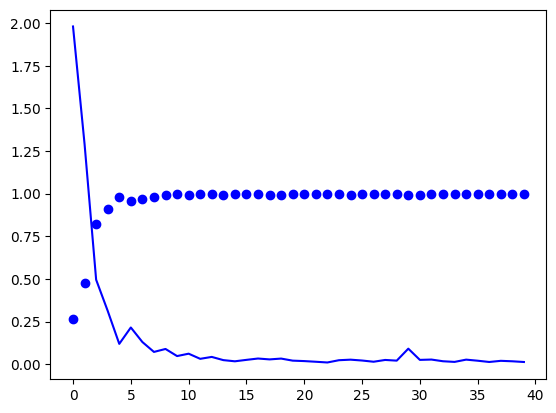

In [14]:
accuracy = frtrain.history['accuracy']
loss = frtrain.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

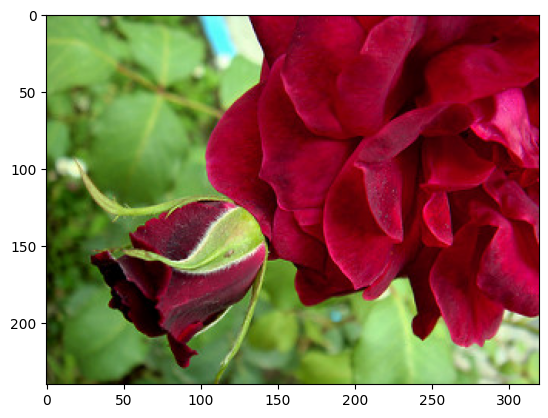

In [19]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = '/content/drive/MyDrive/Colab Notebooks/DATA/VN flowers_5/Flowers/rose (142).jpg'
img = load_img(url)
imshow(img)
     

1/1 [==============================] - 0s 24ms/step
rose


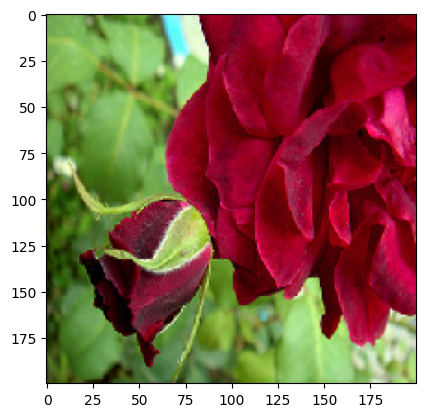

In [20]:
img = load_img(url, target_size = (200,200))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img), axis = -1)
if(a == array([0])):
  print("daisy")
if(a == array([1])):
  print("dandelion")
if(a == array([2])):
  print("rose")
if(a == array([3])):
  print("sunflower")
if(a == array([4])):
  print("tulip")